<h1 style="text-align: center;">Pengenalan PGFPlotsX<h1>
<h3 style="text-align: center;">Fadjar Fathurrahman<h3>

PGFPlotsX adalah paket Julia untuk menghasilkan plot 2d dan 3d melalui pustaka LaTeX bernama pgfplots.

In [1]:
using PGFPlotsX

In [3]:
using SpecialFunctions

Cek apakah program `pdftosvg` tersedia.

In [2]:
PGFPlotsX.HAVE_PDFTOSVG

true

Plot dengan data-data koordinat

In [12]:
@pgf TikzPicture(
  Axis(
    Plot( Coordinates([
            (1.0, 2.0),
            (3.4, 4.5),
            (4.5, 6.7),
        ])
  )
)

LoadError: syntax: incomplete: premature end of input

In [13]:
?Coordinates

search: Coordinates Coordinate



```julia
Coordinates(itr)

```

Convert the argument, which can be any iterable object, to coordinates.

Specifically,

  * `Coordinate` and `Nothing` are passed through *as is*,
  * 2- or 3-element tuples of finite real numbers or strings are interpreted as coordinates,
  * `()`, and tuples with non-finite numbers become `nothing` (representing empty lines).

The resulting coordinates are checked for dimension consistency.

## Examples

The following are equivalent:

```julia
Coordinates((x, 1/x) for x in -5:5)
Coordinates(x == 0 ? () : (x, 1/x) for x in -5:5)
Coordinates(x == 0 ? nothing : Coordinate((x, 1/x)) for x in -5:5)
```

Use `enumerate` to add 1, 2, … for the `x`-axis to an existing set of `y` coordinates:

```julia
Coordinates(enumerate([1, 4, 9]))
```

---

```julia
Coordinates(x, y; xerror, yerror, xerrorplus, yerrorplus, xerrorminus, yerrorminus, meta)

```

Two dimensional coordinates from two vectors, with error bars.

---

```julia
Coordinates(x, y, z; xerror, yerror, zerror, xerrorplus, yerrorplus, zerrorplus, xerrorminus, yerrorminus, zerrorminus, meta)

```

Three dimensional coordinates from two vectors, with error bars.

---

```julia
Coordinates(x, y, z; meta)

```

Construct coordinates from a matrix of values and edge vectors, such that `z[i,j]` corresponds to `x[i]` and `y[j]`. Empty scanlines are inserted, consistently with the `mesh/ordering=x varies` option of PGFPlots (the default).

```julia
x = range(0; stop = 1, length = 10)
y = range(-1; stop = 2, length = 13)
z = sin.(x) + cos.(y')
Coordinates(x, y, z)
```


In [15]:
x = 0.0:1.0

0.0:1.0:1.0

In [21]:
tpl1 = [(x, 1/x) for x in -5:5]

11-element Array{Tuple{Int64,Float64},1}:
 (-5, -0.2)               
 (-4, -0.25)              
 (-3, -0.3333333333333333)
 (-2, -0.5)               
 (-1, -1.0)               
 (0, Inf)                 
 (1, 1.0)                 
 (2, 0.5)                 
 (3, 0.3333333333333333)  
 (4, 0.25)                
 (5, 0.2)                 

In [22]:
typeof(tpl1)

Array{Tuple{Int64,Float64},1}

In [28]:
c1 = Coordinates([
        (1.2, 3.4),
        (3.2, 4.5),
        (3.4, 3.4)
     ]);
c2 = Coordinates([
        (0.0, 4.0),
        (4.5, 2.4),
        (1.0, 4.5)
     ]);

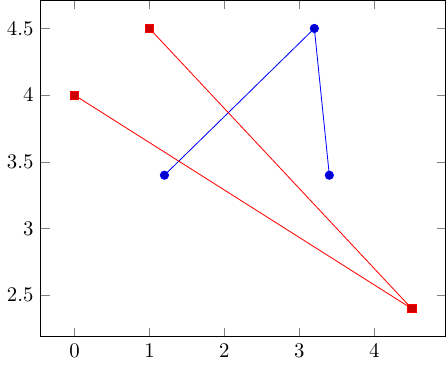

In [29]:
@pgf Axis(
    PlotInc(c1),
    PlotInc(c2),
)

In [46]:
x = range(0.0, 1.0, length=50);
y = sin.(2*pi*x);
y2 = cos.(2*pi*x);

In [47]:
c = Coordinates(x,y);
c2 = Coordinates(x,y2);

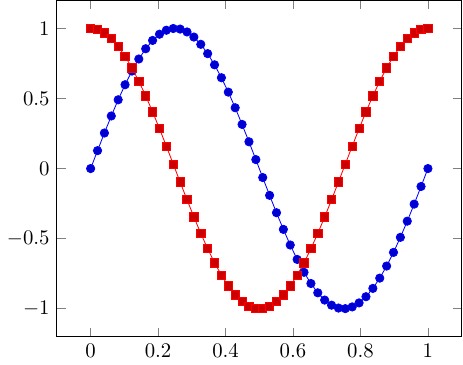

In [48]:
@pgf Axis(
    PlotInc(c),
    PlotInc(c2),
)

# Menggunakan Table

In [14]:
?Table

search: Table TableData mutable struct iswritable isimmutable bytesavailable



```
Table([options], ...; ...)
```

Tabular data with options, corresponding to `table[options] { ... }` in PGFPlots.

`options` stores the options. If that is followed by an `AbstractString`, that will be used as a filename to read data from, otherwise all the arguments are passed on to [`TableData`](@ref).

Examples:

```julia
Table(["x" => 1:10, "y" => 11:20])        # from a vector

Table([1:10, 11:20])                      # same contents, unnamed

Table(Dict(:x => 1:10, :y = 11:20))       # a Dict with symbols

@pgf Table({ "x index" = 2, "y index" = 1" }, randn(10, 3))

let x = range(0; stop = 1, length = 10), y = range(-2; stop =  3, length = 15)
    Table(x, y, sin.(x + y'))             # edges & matrix
end
```


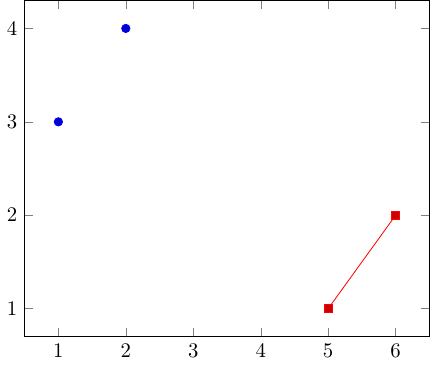

In [4]:
@pgf TikzPicture(
        Axis(
            PlotInc({ only_marks },
                Table(; x = 1:2, y = 3:4)),
            PlotInc(
                Table(; x = 5:6, y = 1:2))))

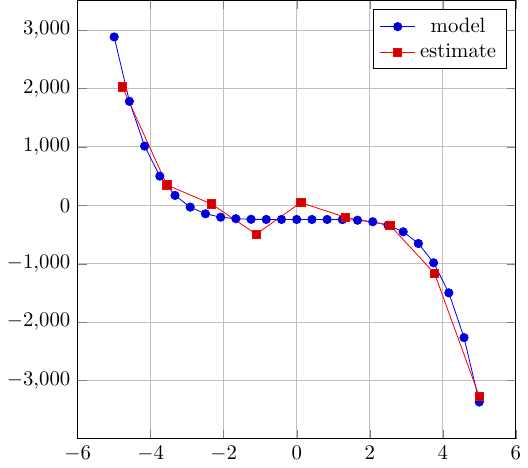

In [4]:
fig = @pgf Axis(
    {
        height = "9cm",
        width = "9cm",
        grid = "major",
    },
    PlotInc(Expression("-x^5 - 242")),
    LegendEntry("model"),
    PlotInc(Coordinates(
        [
            (-4.77778,2027.60977),
            (-3.55556,347.84069),
            (-2.33333,22.58953),
            (-1.11111,-493.50066),
            (0.11111,46.66082),
            (1.33333,-205.56286),
            (2.55556,-341.40638),
            (3.77778,-1169.24780),
            (5.00000,-3269.56775),
        ]
    )),
    LegendEntry("estimate")
)

In [19]:
x = Array(eps():0.05:5);

In [28]:
y = -2.0*erf.(Array(x))./x;

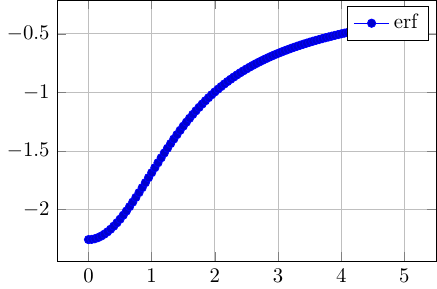

In [27]:
fig = @pgf Axis(
    {
        height = "6cm",
        width = "8cm",
        grid = "major",
    },
    PlotInc(Coordinates(x,y)),
    LegendEntry("erf")
)

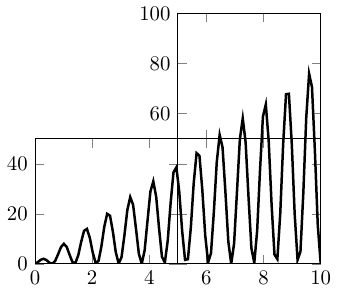

In [29]:
# this is an imitation of the figure in the manual, as we generate the data
x = range(0; stop = 10, length = 100)
@pgf plot = Plot({very_thick}, Table(x = x, y = @. (sin(x * 8) + 1) * 4 * x))
@pgf GroupPlot(
    {
        group_style =
        {
            group_size="2 by 2",
            horizontal_sep="0pt",
            vertical_sep="0pt",
            xticklabels_at="edge bottom"
        },
        xmin = 0,
        ymin = 0,
        height = "3.7cm",
        width = "4cm",
        no_markers
    },
    nothing,
    {xmin=5, xmax=10, ymin=50, ymax=100},
    plot,
    {xmax=5, ymax=50},
    plot,
    {xmin=5, xmax=10, ymax=50, yticklabels={}},
    plot)